In [1]:
!pip install pandas
!pip install numpy
!pip install plotly
!pip install --upgrade nbformat
!pip install scipy
!pip install category_encoders
!pip install matplotlib 
!pip install seaborn 

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as stats
from collections import Counter
import category_encoders as ce 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split  
import re

## <center> 1. Задания модуля </center>

#### 1.2 Разбираемся с данными

In [64]:
data = pd.read_csv('data/hotels.csv')
data.head(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643


**Задание 2.1**


В каких столбцах данные содержат пропущенные значения?

In [4]:
data.isna().sum()

hotel_address                                    0
additional_number_of_scoring                     0
review_date                                      0
average_score                                    0
hotel_name                                       0
reviewer_nationality                             0
negative_review                                  0
review_total_negative_word_counts                0
total_number_of_reviews                          0
positive_review                                  0
review_total_positive_word_counts                0
total_number_of_reviews_reviewer_has_given       0
reviewer_score                                   0
tags                                             0
days_since_review                                0
lat                                           2448
lng                                           2448
dtype: int64

**Задание 2.2**

В каких столбцах данные хранятся в числовом формате?

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [6]:
for col in data.columns:
    if type(data[col].iloc[1]) != str:
        print(col)
    

additional_number_of_scoring
average_score
review_total_negative_word_counts
total_number_of_reviews
review_total_positive_word_counts
total_number_of_reviews_reviewer_has_given
reviewer_score
lat
lng


**Задание 2.3**

В каких столбцах данные представляют собой строки?

In [7]:
for col in data.columns:
    if type(data[col].iloc[1]) == str:
        print(col)

hotel_address
review_date
hotel_name
reviewer_nationality
negative_review
positive_review
tags
days_since_review


Сомнительно, что review_date не строка. Фактически данные внутри являются строкой. 

**Задание 2.4**

Напишите признак, представляющий собой дату.

In [8]:
for col in data.columns:
    try:
        if pd.to_datetime(data[col].iloc[1]) > pd.to_datetime('01/01/2000'):
            print(col)
    except Exception:
        pass

review_date


#### 1.4. Лучший способ добиться успеха — следовать советам

In [9]:
data.columns

Index(['hotel_address', 'additional_number_of_scoring', 'review_date',
       'average_score', 'hotel_name', 'reviewer_nationality',
       'negative_review', 'review_total_negative_word_counts',
       'total_number_of_reviews', 'positive_review',
       'review_total_positive_word_counts',
       'total_number_of_reviews_reviewer_has_given', 'reviewer_score', 'tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

**Задание 4.2**

Сколько уникальных названий отелей представлено в наборе данных?

In [10]:
len(data['hotel_name'].unique())

1492

**Задание 4.3**

Ответьте на вопросы о дате размещения отзывов.

Когда был оставлен самый свежий отзыв? Введите ответ в формате yyyy-mm-dd.

Когда был оставлен самый первый отзыв? Введите ответ в формате yyyy-mm-dd.

In [11]:
display(pd.to_datetime(data['review_date']).min())
display(pd.to_datetime(data['review_date']).max())

Timestamp('2015-08-04 00:00:00')

Timestamp('2017-08-03 00:00:00')

**Задание 4.4**

Сколько уникальных тегов представлено в наборе данных?

In [12]:
tags = data['tags']
tag_count =[]
for tag in range(len(tags)):
    tag_count += data['tags'][tag].strip("[' ").strip(" ']").split(" ', ' ")
len(set(tag_count))

2368

**Задание 4.5**

Какой тег представлен в наибольшем числе отзывов?

In [13]:
Counter(tag_count).most_common(1) 

[('Leisure trip', 313593)]

**Задание 4.6**

Из тегов выясните, на сколько ночей чаще всего останавливаются путешественники в отелях.

In [14]:
tag_count

stayed =[]
for tag in tag_count:
    if 'Stayed' in tag:
       stayed.append(tag)
       
Counter(stayed).most_common(1)

[('Stayed 1 night', 145373)]

## <center> 2. Обработка данных </center>

#### 2.1 Описательный анализ данных

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

Всего имеем  386803 записей

In [16]:
data.isnull().sum()

hotel_address                                    0
additional_number_of_scoring                     0
review_date                                      0
average_score                                    0
hotel_name                                       0
reviewer_nationality                             0
negative_review                                  0
review_total_negative_word_counts                0
total_number_of_reviews                          0
positive_review                                  0
review_total_positive_word_counts                0
total_number_of_reviews_reviewer_has_given       0
reviewer_score                                   0
tags                                             0
days_since_review                                0
lat                                           2448
lng                                           2448
dtype: int64

2448 пустых ячейки в столбцах lat и lng

In [17]:
data.describe(include='all')

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
count,386803,386803.000000,386803,386803.000000,386803,386803,386803,386803.000000,386803.000000,386803,386803.000000,386803.00000,386803.000000,386803,386803,384355.000000,384355.000000
unique,1493,NaN,731,NaN,1492,225,248828,NaN,NaN,311737,NaN,NaN,NaN,47135,731,NaN,NaN
top,163 Marsh Wall Docklands Tower Hamlets London ...,NaN,8/2/2017,NaN,Britannia International Hotel Canary Wharf,United Kingdom,No Negative,NaN,NaN,No Positive,NaN,NaN,NaN,"[' Leisure trip ', ' Couple ', ' Double Room '...",1 days,NaN,NaN
freq,3587,NaN,1911,NaN,3587,184033,95907,NaN,NaN,26885,NaN,NaN,NaN,3853,1911,NaN,NaN
mean,NaN,498.246536,NaN,8.397231,NaN,NaN,NaN,18.538988,2743.992042,NaN,17.776985,7.17725,8.396906,NaN,NaN,49.443522,2.823402
std,NaN,500.258012,NaN,0.547881,NaN,NaN,NaN,29.703369,2316.457018,NaN,21.726141,11.05442,1.636090,NaN,NaN,3.466936,4.579043
min,NaN,1.000000,NaN,5.200000,NaN,NaN,NaN,0.000000,43.000000,NaN,0.000000,1.00000,2.500000,NaN,NaN,41.328376,-0.369758
25%,NaN,169.000000,NaN,8.100000,NaN,NaN,NaN,2.000000,1161.000000,NaN,5.000000,1.00000,7.500000,NaN,NaN,48.214662,-0.143649
50%,NaN,342.000000,NaN,8.400000,NaN,NaN,NaN,9.000000,2134.000000,NaN,11.000000,3.00000,8.800000,NaN,NaN,51.499981,-0.000250
75%,NaN,660.000000,NaN,8.800000,NaN,NaN,NaN,23.000000,3613.000000,NaN,22.000000,8.00000,9.600000,NaN,NaN,51.516288,4.834443


#### 2.1 Очистка данных

Проверим данные на наличие полных дубликатов:

In [18]:
data.duplicated().sum()

np.int64(307)

Найдено 307 дубликатов. Удаляем дубликаты.

In [19]:
data = data.drop_duplicates()
data.duplicated().sum()

np.int64(0)

Заполним пропуски в lat и lng вредним значением.

In [20]:
data['lat'] = data['lat'].fillna(data['lat'].mean())
data['lng'] = data['lng'].fillna(data['lng'].mean())
data.isnull().sum()

hotel_address                                 0
additional_number_of_scoring                  0
review_date                                   0
average_score                                 0
hotel_name                                    0
reviewer_nationality                          0
negative_review                               0
review_total_negative_word_counts             0
total_number_of_reviews                       0
positive_review                               0
review_total_positive_word_counts             0
total_number_of_reviews_reviewer_has_given    0
reviewer_score                                0
tags                                          0
days_since_review                             0
lat                                           0
lng                                           0
dtype: int64

Пропуски отсутствуют.

In [21]:
data.describe()

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,lat,lng
count,386496.000000,386496.000000,386496.000000,386496.000000,386496.000000,386496.000000,386496.000000,386496.000000,386496.000000
mean,498.504375,8.397421,18.539400,2744.679231,17.778163,7.176211,8.397299,49.443988,2.823740
std,500.365093,0.547861,29.703569,2316.934876,21.724766,11.052453,1.635747,3.457265,4.566252
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,2.500000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,7.500000,48.214662,-0.143372
50%,342.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,8.800000,51.499981,0.019886
75%,660.000000,8.800000,23.000000,3633.000000,22.000000,8.000000,9.600000,51.516288,4.831098
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,10.000000,52.400181,16.429233


В таблице выше не видно сильных выбросов. Но есть вероятность, что они есть

Прежде чем проверять числовые данные на выбросы, предлагаю проверить их на нормальность распределения чтобы понять применим ли к ним вообще метод Тьюки. 

In [22]:
# задаём уровень значимости
alpha = 0.05 

# Задаем перечень числовых параметров
num_list = ['average_score', 'review_total_negative_word_counts', 
         'total_number_of_reviews', 'review_total_positive_word_counts', 
         'total_number_of_reviews_reviewer_has_given', 'reviewer_score']

# проводим тест Шапиро — Уилка
for col in num_list:
    _, p= stats.shapiro(data[col])
    if p <= alpha:
        print(f'Распределение {col} не нормальное')
    else:
        print(f'Распределение {col} нормальное')



Распределение average_score не нормальное
Распределение review_total_negative_word_counts не нормальное
Распределение total_number_of_reviews не нормальное
Распределение review_total_positive_word_counts не нормальное
Распределение total_number_of_reviews_reviewer_has_given не нормальное
Распределение reviewer_score не нормальное


c:\Projects\DS\booking\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 386496.
  res = hypotest_fun_out(*samples, **kwds)


Параметры не имеют нормального распределения. Нет смысла применять метод ТЬюки.

#### 2.2 Проектирование признаков

Посмотрим, что можно извлечь из столбца hotel_address.

In [23]:
print(data['hotel_address'][0],'/', data['hotel_address'][5000])

Stratton Street Mayfair Westminster Borough London W1J 8LT United Kingdom / Prinses Irenestraat 30 Zuideramstel 1077 WX Amsterdam Netherlands


Последними словами идет страна. Попробуем ее извлечь.

In [24]:
print(data['hotel_address'].apply(lambda x: x.split()[-1]).unique())

['Kingdom' 'France' 'Netherlands' 'Italy' 'Austria' 'Spain']


In [25]:
data['hotel_country'] = data['hotel_address'].apply(lambda x: x.split()[-1] 
                                                    if x.split()[-1] != 'Kingdom' 
                                                    else x.split()[-2] + ' ' + x.split()[-1])

Обрабатываем значение и приводим перводим в категории и сбрасываем ненужный столбец.

In [26]:
data['hotel_country'] = data['hotel_country'].astype('category')
data = data.drop(['hotel_address'], axis=1)


additional_number_of_scoring оставляем без изменений. 

Рассмотрим review_date. У нас уже есть столбец days_since_review. Мне кажется, что его использовать удобнее. сбрасываем review_date.

In [27]:
data = data.drop(['review_date'], axis=1)

In [28]:
data['days_since_review'] = \
data['days_since_review'].apply(lambda x: int(x.replace(' days', '').replace(' day', '')))

In [29]:
data.head(2)

,additional_number_of_scoring,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng,hotel_country
0,581,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531,51.507894,-0.143671,United Kingdom
1,299,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203,51.521009,-0.123097,United Kingdom


Рассмотрим hotel_name.

In [30]:
print(data['hotel_name'][0],'/', data['hotel_name'][10000])

The May Fair Hotel / Holiday Inn London Regent s Park


Попробуем закодировать бинарным способом

In [31]:
bin_encoder = ce.BinaryEncoder(cols=['hotel_name'])
hotel_name = bin_encoder.fit_transform(data['hotel_name'])
data = pd.concat([data, hotel_name], axis=1)

Удаляем изначальный признак hotel_name

In [32]:
data = data.drop(['hotel_name'], axis=1)
data.head()

,additional_number_of_scoring,average_score,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,...,hotel_name_1,hotel_name_2,hotel_name_3,hotel_name_4,hotel_name_5,hotel_name_6,hotel_name_7,hotel_name_8,hotel_name_9,hotel_name_10
0,581,8.4,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,...,0,0,0,0,0,0,0,0,0,1
1,299,8.3,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,...,0,0,0,0,0,0,0,0,1,0
2,32,8.9,China,No kettle in room,6,406,No Positive,0,14,7.5,...,0,0,0,0,0,0,0,0,1,1
3,34,7.5,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,...,0,0,0,0,0,0,0,1,0,0
4,914,8.5,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,...,0,0,0,0,0,0,0,1,0,1


Далее рассматриваем параметр reviewer_nationality.

In [33]:
data['reviewer_nationality'].unique()

array([' United Kingdom ', ' China ', ' Poland ', ' France ',
       ' Switzerland ', ' Bulgaria ', ' Lebanon ',
       ' United Arab Emirates ', ' South Africa ', ' Nigeria ',
       ' Sweden ', ' United States of America ', ' Hong Kong ',
       ' Luxembourg ', ' Netherlands ', ' Jersey ', ' Pakistan ',
       ' Mexico ', ' Italy ', ' Singapore ', ' Ireland ', ' Kuwait ',
       ' Bahrain ', ' Portugal ', ' Canada ', ' Germany ', ' Oman ',
       ' Austria ', ' Japan ', ' Ukraine ', ' Finland ', ' Iran ',
       ' Thailand ', ' Brazil ', ' Denmark ', ' Australia ', ' Spain ',
       ' Gabon ', ' New Zealand ', ' Israel ', ' Cyprus ', ' Gibraltar ',
       ' Turkey ', ' Egypt ', ' Indonesia ', ' Slovakia ', ' Qatar ',
       ' Romania ', ' Belgium ', ' Trinidad and Tobago ', ' ',
       ' Saudi Arabia ', ' Bhutan ', ' Iceland ', ' Norway ',
       ' Sri Lanka ', ' Isle of Man ', ' Greece ', ' Slovenia ',
       ' Serbia ', ' Czech Republic ', ' Hungary ', ' Latvia ',
       ' Estonia 

Врядли имеет смысл рассматривать все эти страны. Предлагаю Сократить до количества стран равного количеству стран hotel_country. 

Далее предлагаю одинаково закодировать оба признака и ввести признак совпадения hotel_country reviewer_nationality. Есть вероятность, что признак будет влиять на оценку отеля.

In [34]:
countries_dict = {'United Kingdom':1, 'France':2, 'Netherlands':3, 'Italy':4, 'Austria':5, 'Spain':6, 'other':7}

data['reviewer_nationality'] = data['reviewer_nationality'].apply(lambda x: x.strip())
data['reviewer_nationality'] = data['reviewer_nationality'].apply(lambda x: x if x in countries_dict.keys() else 'other')
display(data['reviewer_nationality'].unique())


array(['United Kingdom', 'other', 'France', 'Netherlands', 'Italy',
       'Austria', 'Spain'], dtype=object)

In [35]:
# создаем объект OrdinalEncoder, col - имя столбца, mapping - словарь с описанием кодировки
ord_encoder = ce.OrdinalEncoder(mapping=[{
	'col': 'reviewer_nationality',
	'mapping': countries_dict
}])
# применяем трансформацию к столбцу reviewer_nationality
data_bin = ord_encoder.fit_transform(data['reviewer_nationality'])
# добавляем результат к исходному DataFrame
data['reviewer_nationality']=data_bin


ord_encoder = ce.OrdinalEncoder(mapping=[{
	'col': 'hotel_country',
	'mapping': countries_dict
}])
# применяем трансформацию к столбцу
data_bin = ord_encoder.fit_transform(data['hotel_country'])
# добавляем результат к исходному DataFrame
data['hotel_country']=data_bin


In [36]:
data['hotel_country_is_reviewer_nationality'] = data['reviewer_nationality'] == data['hotel_country']

In [37]:
data.head(3)

,additional_number_of_scoring,average_score,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,...,hotel_name_2,hotel_name_3,hotel_name_4,hotel_name_5,hotel_name_6,hotel_name_7,hotel_name_8,hotel_name_9,hotel_name_10,hotel_country_is_reviewer_nationality
0,581,8.4,1,Leaving,3,1994,Staff were amazing,4,7,10.0,...,0,0,0,0,0,0,0,0,1,True
1,299,8.3,1,poor breakfast,3,1361,location,2,14,6.3,...,0,0,0,0,0,0,0,1,0,True
2,32,8.9,7,No kettle in room,6,406,No Positive,0,14,7.5,...,0,0,0,0,0,0,0,1,1,False


Рассмотрим negative_review. Его имеет смысл рассматривать вместе с positive_review.

In [38]:
print(len(data['negative_review'].unique()), len(data['positive_review'].unique()))

248828 311737


Одтинаковых отзывов слишком мало. Предлагаю извлечь из отзывов упоминание персонала и создать два признака: negative_stuff и positive_stuff.

In [39]:
data['negative_stuff'] = data['negative_review'].apply(lambda x: 1 if 'stuff' in x.lower() else 0)
data['positive_stuff'] = data['positive_review'].apply(lambda x: 1 if 'stuff' in x.lower() else 0)

In [40]:
display(data['negative_stuff'].sum(), data['positive_stuff'].sum())

np.int64(1807)

np.int64(2391)

не слишком много, но можно попробовать. Удаляем столбцы отзывов.

In [41]:
data = data.drop(['negative_review', 'positive_review'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 386496 entries, 0 to 386802
Data columns (total 27 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386496 non-null  int64  
 1   average_score                               386496 non-null  float64
 2   reviewer_nationality                        386496 non-null  int64  
 3   review_total_negative_word_counts           386496 non-null  int64  
 4   total_number_of_reviews                     386496 non-null  int64  
 5   review_total_positive_word_counts           386496 non-null  int64  
 6   total_number_of_reviews_reviewer_has_given  386496 non-null  int64  
 7   reviewer_score                              386496 non-null  float64
 8   tags                                        386496 non-null  object 
 9   days_since_review                           386496 non-null  int64  
 10  l

Остается рвссмотреть тольго столбец tags.

In [42]:
# tags = data['tags']
# tag_count =[]
# for tag in range(len(tags)):
#     tag_count += data['tags'][tag].strip("[' ").strip(" ']").split(" ', ' ")
    
Counter(tag_count).most_common(10)

[('Leisure trip', 313593),
 ('Submitted from a mobile device', 230778),
 ('Couple', 189212),
 ('Stayed 1 night', 145373),
 ('Stayed 2 nights', 100263),
 ('Solo traveler', 81235),
 ('Stayed 3 nights', 72000),
 ('Business trip', 61989),
 ('Group', 49088),
 ('Family with young children', 45836)]

Предлагаю взять наиболее популярные 7 признаков и добавить соответствующие столбцы в таблицу (Признаик о пребывании обработаем по-другому). Также предлагаю добавить столбец stayed (пребывание).

In [43]:
tag_common = ['Leisure trip', 'Submitted from a mobile device', 
              'Couple', 'Solo traveler', 'Business trip', 'Group', 
              'Family with young children']

for tag in tag_common:
    data[tag] = data['tags'].apply(lambda x: tag in x)

Также предлагаю добавить столбец stayed (пребывание). Количество ночей.

In [44]:
set(stayed)

{'Stayed 1 night',
 'Stayed 10 nights',
 'Stayed 11 nights',
 'Stayed 12 nights',
 'Stayed 13 nights',
 'Stayed 14 nights',
 'Stayed 15 nights',
 'Stayed 16 nights',
 'Stayed 17 nights',
 'Stayed 18 nights',
 'Stayed 19 nights',
 'Stayed 2 nights',
 'Stayed 20 nights',
 'Stayed 21 nights',
 'Stayed 22 nights',
 'Stayed 23 nights',
 'Stayed 24 nights',
 'Stayed 25 nights',
 'Stayed 26 nights',
 'Stayed 27 nights',
 'Stayed 28 nights',
 'Stayed 29 nights',
 'Stayed 3 nights',
 'Stayed 30 nights',
 'Stayed 4 nights',
 'Stayed 5 nights',
 'Stayed 6 nights',
 'Stayed 7 nights',
 'Stayed 8 nights',
 'Stayed 9 nights'}

In [45]:
def stayed_parse(x):
    x = x.replace('Stayed ', '')
    if x[1] ==' ':
        x = x[0]
    else:
        x = x[:2] 
    return int(x)

In [46]:
data['stayed'] = data['tags'].\
apply(lambda x: re.search(r'Stayed \d.', x).group() if re.search(r'Stayed \d.', x) else '00')
data['stayed'] = data['stayed'].apply(stayed_parse)

In [47]:
data['stayed'].unique()

array([ 2,  1,  3,  6,  4,  5,  8,  7, 10, 14, 19, 13,  9, 17, 11,  0, 27,
       12, 15, 21, 18, 16, 26, 24, 30, 22, 23, 28, 20, 25, 29])

In [48]:
data = data.drop('tags', axis = 1) 

#### 2.3 Отбор признаков

In [49]:
fig = px.imshow(data.corr(numeric_only=True), 
                text_auto=True, aspect="auto",
                # width=40,
                # height=100
                )
fig.update_layout(width=1500, height=1500)
fig.show()

В соответствии с тепловой картой можем выделить следующие пары признаков с сильно й корреляцией:
1. *additional_number_of_scoring*  и total_number_of_reviews
2. lat и *hotel_country*
3. *reviewer_nationality* и hotel_country_is_reviewer_nationality
4. Leisure trip и *Business trip*

Предлагаю удалить признаки: total_number_of_reviews, lat, hotel_country_is_reviewer_nationality, Leisure trip

In [50]:
data = data.drop(['total_number_of_reviews', 'lat', 'hotel_country_is_reviewer_nationality', 'Leisure trip'], axis = 1) 

In [51]:
fig = px.imshow(data.corr(numeric_only=True), 
                text_auto=True, aspect="auto",
                # width=40,
                # height=100
                )
fig.update_layout(width=1500, height=1500)
fig.show()

Разобьем признаки на непрерывные и категориальные

In [52]:
# непрерывные признаки
num_cols = ['additional_number_of_scoring', 'average_score', 
            'review_total_negative_word_counts', 'review_total_positive_word_counts', 
            'total_number_of_reviews_reviewer_has_given', 'days_since_review', 
            'lng', 'stayed']

# категориальные признаки
cat_cols = ['reviewer_nationality', 'hotel_country', 'hotel_name_0', 'hotel_name_1', 'hotel_name_2',
            'hotel_name_3', 'hotel_name_4', 'hotel_name_5', 'hotel_name_6', 'hotel_name_7',
            'hotel_name_8', 'hotel_name_9', 'hotel_name_10', 'negative_stuff', 'positive_stuff', 
            'Submitted from a mobile device', 'Couple', 'Solo traveler', 'Business trip', 'Group', 
            'Family with young children']

In [53]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
X = data.drop(['reviewer_score'], axis = 1)  
y = data['reviewer_score'] 

Определим важность категориальных признаков.

<Axes: >

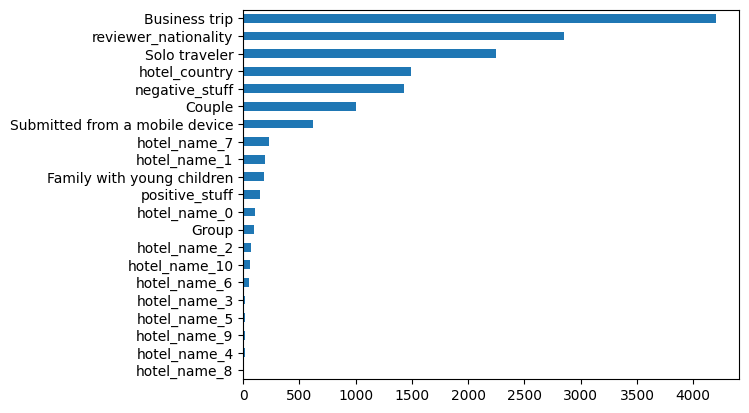

In [54]:
y=y.astype('int')

from sklearn.feature_selection import chi2 # хи-квадрат

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

Столбцы к удалению:

In [55]:
cat_cols_to_delete = ['hotel_name_0', 'hotel_name_1', 'hotel_name_2', 'hotel_name_3',
                      'hotel_name_4', 'hotel_name_5', 'hotel_name_6', 'hotel_name_7',
                      'hotel_name_8', 'hotel_name_9', 'hotel_name_10', 'Family with young children',
                      'Group']

Определим важность непрерывных признаков.

<Axes: >

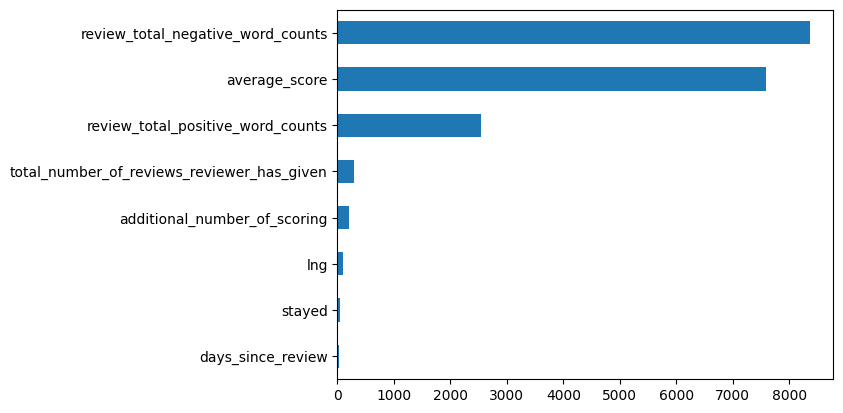

In [56]:
from sklearn.feature_selection import f_classif # anova

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

Столбцы к удалению:

In [57]:
data.columns

Index(['additional_number_of_scoring', 'average_score', 'reviewer_nationality',
       'review_total_negative_word_counts',
       'review_total_positive_word_counts',
       'total_number_of_reviews_reviewer_has_given', 'reviewer_score',
       'days_since_review', 'lng', 'hotel_country', 'hotel_name_0',
       'hotel_name_1', 'hotel_name_2', 'hotel_name_3', 'hotel_name_4',
       'hotel_name_5', 'hotel_name_6', 'hotel_name_7', 'hotel_name_8',
       'hotel_name_9', 'hotel_name_10', 'negative_stuff', 'positive_stuff',
       'Submitted from a mobile device', 'Couple', 'Solo traveler',
       'Business trip', 'Group', 'Family with young children', 'stayed'],
      dtype='object')

In [58]:
num_cols_to_delete = ['stayed', 'days_since_review', 'lng', 'additional_number_of_scoring', 
                      'total_number_of_reviews_reviewer_has_given']

In [59]:
X = data.drop(num_cols_to_delete + cat_cols_to_delete, axis = 1)  

## <center> 3. Построение модели </center>

In [60]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [61]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
  
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)

In [62]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.0


In [63]:
data

,additional_number_of_scoring,average_score,reviewer_nationality,review_total_negative_word_counts,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,days_since_review,lng,hotel_country,...,hotel_name_10,negative_stuff,positive_stuff,Submitted from a mobile device,Couple,Solo traveler,Business trip,Group,Family with young children,stayed
0,581,8.4,1,3,4,7,10.0,531,-0.143671,1,...,1,0,0,True,True,False,False,False,False,2
1,299,8.3,1,3,2,14,6.3,203,-0.123097,1,...,0,0,0,False,True,False,True,False,False,1
2,32,8.9,7,6,0,14,7.5,289,2.325643,2,...,1,0,0,True,False,True,False,False,False,3
3,34,7.5,1,0,11,8,10.0,681,2.394540,2,...,0,0,0,False,False,True,False,False,False,1
4,914,8.5,7,4,20,10,9.6,516,4.847060,3,...,1,0,0,False,True,False,True,False,False,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386798,107,9.0,2,0,10,10,8.8,106,-0.191050,1,...,1,0,0,True,False,False,False,True,False,2
386799,272,8.4,7,0,93,1,9.2,171,16.399451,5,...,1,0,0,True,True,False,False,False,False,4
386800,457,6.8,3,12,9,21,8.3,543,-0.131084,1,...,0,0,0,False,False,True,True,False,False,1
386801,365,8.1,7,0,6,28,9.2,74,-0.160066,1,...,0,0,0,False,False,True,False,False,False,2
